In [1]:
import os
import sys
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from dash import html, dcc, Input, Output, callback
from Isolation_Forest import IsolationForestAnomalyDetector

In [2]:
##################
# Build 2x2 figure
##################
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        "1D Binary Partition",
        "2D Binary Partition",
        "1D Tree Node",
        "2D Tree Node"
    ),
    horizontal_spacing=0.1,
    vertical_spacing=0.15
)

##################
# One-Dimensional
##################
# Make it 2D (n, 1) because the class expects X with shape (M, d)
random_one_dimensional_array = np.random.normal(
    loc=0.0,
    scale=1.0,
    size=20
).reshape(-1, 1)

one_dimensional_iForest_model = IsolationForestAnomalyDetector(
    random_one_dimensional_array
)

(split_1d_from_left,
 split_1d_from_right,
 random_1d_axis_to_cut,
 random_1d_point_on_axis_to_cut) = one_dimensional_iForest_model.binary_partition()


#########################################


split_1d_from_left:

[[-0.43833431]
 [-0.25389274]
 [-1.17775258]
 [-0.67437052]
 [-0.82713048]
 [ 0.67440437]
 [ 0.19789684]
 [-0.4526528 ]
 [-0.79194139]
 [ 0.2292219 ]
 [-0.37104507]
 [-1.0863389 ]
 [ 0.61107699]
 [ 0.6949645 ]
 [ 0.70971147]]

split_1d_from_right:

[[1.72896036]
 [2.25119473]
 [1.10147489]
 [2.14995207]
 [1.39604323]]

random_1d_axis_to_cut:

0

random_1d_point_on_axis_to_cut:

1.0279698673299318

#########################################



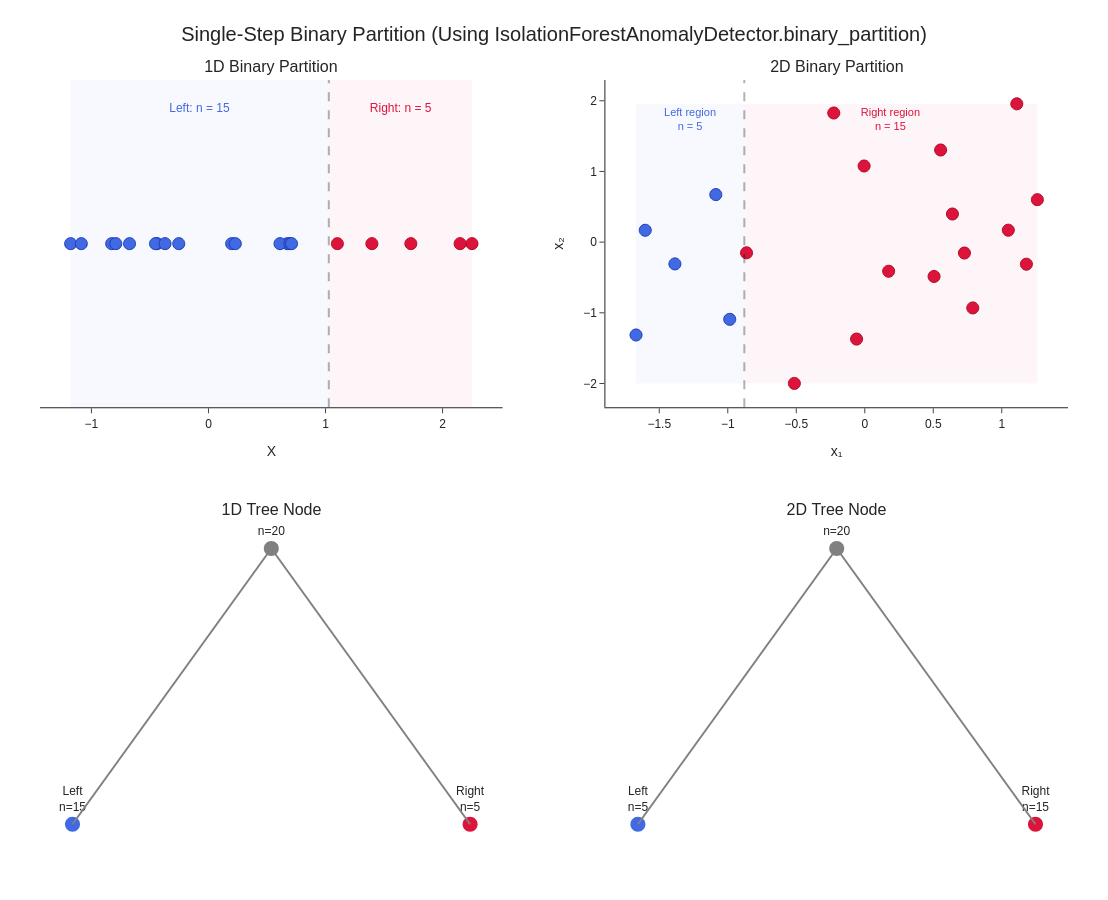

In [3]:
##################
# Build 2x2 figure
##################
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        "1D Binary Partition",
        "2D Binary Partition",
        "1D Tree Node",
        "2D Tree Node"
    ),
    horizontal_spacing=0.1,
    vertical_spacing=0.15
)

##################
# One-Dimensional
##################
# Make it 2D (n, 1) because the class expects X with shape (M, d)
random_one_dimensional_array = np.random.normal(
    loc=0.0,
    scale=1.0,
    size=20
).reshape(-1, 1)

one_dimensional_iForest_model = IsolationForestAnomalyDetector(
    random_one_dimensional_array
)

(split_1d_from_left,
 split_1d_from_right,
 random_1d_axis_to_cut,
 random_1d_point_on_axis_to_cut) = one_dimensional_iForest_model.binary_partition()

print("\n#########################################\n")
print("\nsplit_1d_from_left:\n")
print(split_1d_from_left)
print("\nsplit_1d_from_right:\n")
print(split_1d_from_right)
print("\nrandom_1d_axis_to_cut:\n")
print(random_1d_axis_to_cut)
print("\nrandom_1d_point_on_axis_to_cut:\n")
print(random_1d_point_on_axis_to_cut)
print("\n#########################################\n")

# === Top-left: 1D points + split + shaded intervals ===
fig.add_trace(
    go.Scatter(
        x=split_1d_from_left.flatten(),
        y=np.zeros(len(split_1d_from_left.flatten())),
        mode='markers',
        name='1D Left Split',
        marker=dict(
            size=12,
            color='rgb(65, 105, 225)',
            line=dict(color='rgb(30, 60, 180)', width=1)
        )
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=split_1d_from_right.flatten(),
        y=np.zeros(len(split_1d_from_right.flatten())),
        mode='markers',
        name='1D Right Split',
        marker=dict(
            size=12,
            color='rgb(220, 20, 60)',
            line=dict(color='rgb(180, 10, 40)', width=1)
        )
    ),
    row=1, col=1
)

# Split line
fig.add_vline(
    x=random_1d_point_on_axis_to_cut,
    line_dash="dash",
    line_color="black",
    line_width=2,
    row=1, col=1
)

# Get bounds for shading
x1_min = random_one_dimensional_array.min()
x1_max = random_one_dimensional_array.max()

# Shaded intervals (layer='below' puts them behind the points)
fig.add_shape(
    type="rect",
    x0=x1_min,
    x1=random_1d_point_on_axis_to_cut,
    y0=-0.3,
    y1=0.3,
    fillcolor="rgba(65, 105, 225, 0.15)",
    line=dict(width=0),
    layer='below',
    row=1, col=1
)
fig.add_shape(
    type="rect",
    x0=random_1d_point_on_axis_to_cut,
    x1=x1_max,
    y0=-0.3,
    y1=0.3,
    fillcolor="rgba(220, 20, 60, 0.15)",
    line=dict(width=0),
    layer='below',
    row=1, col=1
)

fig.add_annotation(
    x=(x1_min + random_1d_point_on_axis_to_cut) / 2,
    y=0.25,
    text=f"Left: n = {len(split_1d_from_left)}",
    showarrow=False,
    font=dict(size=12, color='rgb(65, 105, 225)'),
    row=1, col=1
)
fig.add_annotation(
    x=(random_1d_point_on_axis_to_cut + x1_max) / 2,
    y=0.25,
    text=f"Right: n = {len(split_1d_from_right)}",
    showarrow=False,
    font=dict(size=12, color='rgb(220, 20, 60)'),
    row=1, col=1
)

fig.update_xaxes(title_text="X", row=1, col=1)
fig.update_yaxes(visible=False, row=1, col=1)

# === Bottom-left: 1D tree node diagram ===
fig.add_trace(
    go.Scatter(
        x=[0.5, 0.2, 0.8],
        y=[1.0, 0.0, 0.0],
        mode="markers+text",
        text=[
            f"Root<br>n={len(random_one_dimensional_array)}",
            f"Left<br>n={len(split_1d_from_left)}",
            f"Right<br>n={len(split_1d_from_right)}"
        ],
        textposition="top center",
        marker=dict(size=15, color=['gray', 'rgb(65, 105, 225)', 'rgb(220, 20, 60)']),
        showlegend=False
    ),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(
        x=[0.5, 0.2, None, 0.5, 0.8],
        y=[1.0, 0.0, None, 1.0, 0.0],
        mode="lines",
        line=dict(color='gray', width=2),
        showlegend=False
    ),
    row=2, col=1
)
fig.update_xaxes(visible=False, row=2, col=1)
fig.update_yaxes(visible=False, row=2, col=1)

##################
# Two-Dimensional
##################
random_two_dimensional_array = np.random.multivariate_normal(
    mean=[0.0, 0.0],
    cov=[[1.0, 0.0], [0.0, 1.0]],
    size=20
)

two_dimensional_iForest_model = IsolationForestAnomalyDetector(
    random_two_dimensional_array
)

(split_2d_from_left,
 split_2d_from_right,
 random_2d_axis_to_cut,
 random_2d_point_on_axis_to_cut) = two_dimensional_iForest_model.binary_partition()

# Determine split orientation
if random_2d_axis_to_cut == 0:
    split_axis = "vertical"
else:
    split_axis = "horizontal"

# Calculate bounds
x2_min = random_two_dimensional_array[:, 0].min()
x2_max = random_two_dimensional_array[:, 0].max()
y2_min = random_two_dimensional_array[:, 1].min()
y2_max = random_two_dimensional_array[:, 1].max()

n_left_2d = len(split_2d_from_left)
n_right_2d = len(split_2d_from_right)

# === Top-right: 2D scatter + split + shaded rectangles ===
fig.add_trace(
    go.Scatter(
        x=split_2d_from_left[:, 0],
        y=split_2d_from_left[:, 1],
        mode="markers",
        name="2D Left",
        marker=dict(
            size=12,
            color='rgb(65, 105, 225)',
            line=dict(color='rgb(30, 60, 180)', width=1)
        ),
        showlegend=False
    ),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(
        x=split_2d_from_right[:, 0],
        y=split_2d_from_right[:, 1],
        mode="markers",
        name="2D Right",
        marker=dict(
            size=12,
            color='rgb(220, 20, 60)',
            line=dict(color='rgb(180, 10, 40)', width=1)
        ),
        showlegend=False
    ),
    row=1, col=2
)

if split_axis == "vertical":
    # Split line
    fig.add_vline(
        x=random_2d_point_on_axis_to_cut,
        line_dash="dash",
        line_color="black",
        line_width=2,
        row=1, col=2
    )

    # Left region (layer='below' puts it behind the points)
    fig.add_shape(
        type="rect",
        x0=x2_min,
        x1=random_2d_point_on_axis_to_cut,
        y0=y2_min,
        y1=y2_max,
        fillcolor="rgba(65, 105, 225, 0.15)",
        line=dict(width=0),
        layer='below',
        row=1, col=2
    )
    # Right region
    fig.add_shape(
        type="rect",
        x0=random_2d_point_on_axis_to_cut,
        x1=x2_max,
        y0=y2_min,
        y1=y2_max,
        fillcolor="rgba(220, 20, 60, 0.15)",
        line=dict(width=0),
        layer='below',
        row=1, col=2
    )

    fig.add_annotation(
        x=(x2_min + random_2d_point_on_axis_to_cut) / 2,
        y=y2_max - 0.2,
        text=f"Left region<br>n = {n_left_2d}",
        showarrow=False,
        font=dict(size=11, color='rgb(65, 105, 225)'),
        row=1, col=2
    )
    fig.add_annotation(
        x=(random_2d_point_on_axis_to_cut + x2_max) / 2,
        y=y2_max - 0.2,
        text=f"Right region<br>n = {n_right_2d}",
        showarrow=False,
        font=dict(size=11, color='rgb(220, 20, 60)'),
        row=1, col=2
    )

else:  # horizontal split
    fig.add_hline(
        y=random_2d_point_on_axis_to_cut,
        line_dash="dash",
        line_color="black",
        line_width=2,
        row=1, col=2
    )

    # Bottom region (layer='below' puts it behind the points)
    fig.add_shape(
        type="rect",
        x0=x2_min,
        x1=x2_max,
        y0=y2_min,
        y1=random_2d_point_on_axis_to_cut,
        fillcolor="rgba(65, 105, 225, 0.15)",
        line=dict(width=0),
        layer='below',
        row=1, col=2
    )
    # Top region
    fig.add_shape(
        type="rect",
        x0=x2_min,
        x1=x2_max,
        y0=random_2d_point_on_axis_to_cut,
        y1=y2_max,
        fillcolor="rgba(220, 20, 60, 0.15)",
        line=dict(width=0),
        layer='below',
        row=1, col=2
    )

    fig.add_annotation(
        x=(x2_min + x2_max) / 2,
        y=(y2_min + random_2d_point_on_axis_to_cut) / 2,
        text=f"Lower region<br>n = {n_left_2d}",
        showarrow=False,
        font=dict(size=11, color='rgb(65, 105, 225)'),
        row=1, col=2
    )
    fig.add_annotation(
        x=(x2_min + x2_max) / 2,
        y=(random_2d_point_on_axis_to_cut + y2_max) / 2,
        text=f"Upper region<br>n = {n_right_2d}",
        showarrow=False,
        font=dict(size=11, color='rgb(220, 20, 60)'),
        row=1, col=2
    )

fig.update_xaxes(title_text="x₁", row=1, col=2)
fig.update_yaxes(title_text="x₂", row=1, col=2)

# === Bottom-right: 2D tree node diagram ===
axis_name = "x₁" if random_2d_axis_to_cut == 0 else "x₂"
fig.add_trace(
    go.Scatter(
        x=[0.5, 0.2, 0.8],
        y=[1.0, 0.0, 0.0],
        mode="markers+text",
        text=[
            f"Root (split on {axis_name})<br>n={n_left_2d + n_right_2d}",
            f"Left<br>n={n_left_2d}",
            f"Right<br>n={n_right_2d}"
        ],
        textposition="top center",
        marker=dict(size=15, color=['gray', 'rgb(65, 105, 225)', 'rgb(220, 20, 60)']),
        showlegend=False
    ),
    row=2, col=2
)
fig.add_trace(
    go.Scatter(
        x=[0.5, 0.2, None, 0.5, 0.8],
        y=[1.0, 0.0, None, 1.0, 0.0],
        mode="lines",
        line=dict(color='gray', width=2),
        showlegend=False
    ),
    row=2, col=2
)
fig.update_xaxes(visible=False, row=2, col=2)
fig.update_yaxes(visible=False, row=2, col=2)

fig.update_layout(
    height=900,
    width=1200,
    margin=dict(l=40, r=40, t=80, b=50),
    template="simple_white",
    title={
        "text": "Single-Step Binary Partition (Using IsolationForestAnomalyDetector.binary_partition)",
        "x": 0.5,
        "xanchor": "center",
        "y": 0.97,
        "font": dict(size=20)
    },
    showlegend=False
)